In [2]:
#price forecasting

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [40]:
stocks =['TCS.NS']
new_data = pd.DataFrame()
for t in stocks:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1', end = '2010-1-1')['Close']

In [41]:
log_return = np.log(1 + new_data.pct_change())
log_return.tail()

,TCS.NS
Date,
2009-12-16,0.017255
2009-12-17,0.013372
2009-12-18,0.006551
2009-12-21,0.008963
2009-12-22,-0.013717


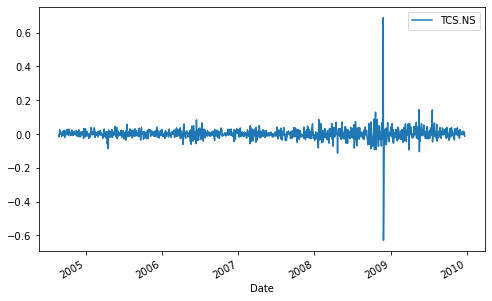

In [42]:
log_return.plot(figsize=(8,5))

In [43]:
u = log_return.mean()
u

TCS.NS    0.000818
dtype: float64

In [44]:
var =  log_return.var()
var

TCS.NS    0.00127
dtype: float64

In [45]:
# drift = mean - 0.5*var
drift = u - 0.5 * var
drift

TCS.NS    0.000183
dtype: float64

In [46]:
stdv = log_return.std()
stdv

TCS.NS    0.035637
dtype: float64

In [47]:
drift.values
stdv.values

array([0.0356365])

In [48]:
# z - distance b/w mean and the event measured in std dev
#z = norm.ppf(np.random.rand(10,2))
# interval is no of days
# iterations is no of simulations

In [49]:
t_intervals = 1000
iterations = 10

In [50]:
daily_returns = np.exp(drift.values + stdv.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [51]:
S0 =new_data.iloc[-1]
S0

TCS.NS    362.024994
Name: 2009-12-22 00:00:00, dtype: float64

In [52]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[362.0249939, 362.0249939, 362.0249939, ..., 362.0249939,
        362.0249939, 362.0249939],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [53]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list


array([[ 362.0249939 ,  362.0249939 ,  362.0249939 , ...,  362.0249939 ,
         362.0249939 ,  362.0249939 ],
       [ 361.58646083,  347.61792724,  349.24881826, ...,  360.76839442,
         372.50816785,  353.51692471],
       [ 366.89233516,  340.93084321,  355.71672119, ...,  376.52157681,
         345.71625112,  342.08472991],
       ...,
       [ 268.12561233, 2312.94699787,  199.45150628, ...,  696.40174554,
         385.88206012,  460.91317282],
       [ 261.99738766, 2378.31502694,  194.10282324, ...,  705.02544181,
         375.3232507 ,  471.69434845],
       [ 257.79780587, 2357.27648743,  194.84864129, ...,  700.20318349,
         378.66223575,  464.08177307]])

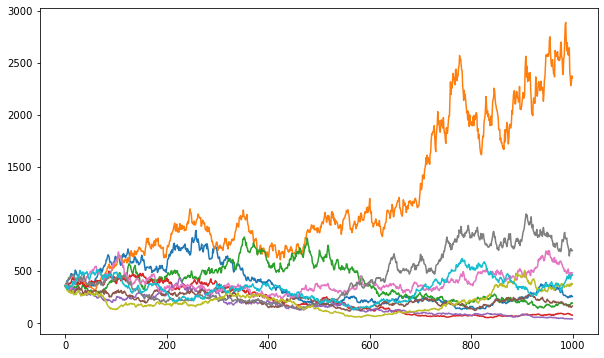

In [54]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()